# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Import Statements

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

### Load the Data

In [3]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
df_data_info = df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [5]:
df_data_shape = df_data.shape

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [6]:
df_data["Date"] = pd.to_datetime(df_data['Date'])
df_data["Year"] = df_data['Date'].apply(lambda datetime: datetime.year)
df_data["Month"] = df_data['Date'].apply(lambda datetime: datetime.month)

In [7]:
df = df_data.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)

In [8]:
df[df['Price'] == "5,000.0"]
df[df['Price'] == "1,160.0"]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month
3149,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1973-05-14 17:30:00+00:00,Saturn V | Skylab 1,StatusRetired,"1,160.0",Success,1973,5
3180,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1972-12-19 19:24:00+00:00,Saturn V | Apollo 17,StatusRetired,"1,160.0",Success,1972,12
3243,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1972-04-16 17:54:00+00:00,Saturn V | Apollo 16,StatusRetired,"1,160.0",Success,1972,4
3328,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1971-07-26 13:34:00+00:00,Saturn V | Apollo 15,StatusRetired,"1,160.0",Success,1971,7
3384,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1971-01-31 21:03:00+00:00,Saturn V | Apollo 14,StatusRetired,"1,160.0",Success,1971,1
3475,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1970-04-11 19:13:00+00:00,Saturn V | Apollo 13,StatusRetired,"1,160.0",Success,1970,4
3511,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-11-14 16:22:00+00:00,Saturn V | Apollo 12,StatusRetired,"1,160.0",Success,1969,11
3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-07-16 13:32:00+00:00,Saturn V | Apollo 11,StatusRetired,"1,160.0",Success,1969,7
3560,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1969-05-18 16:49:00+00:00,Saturn V | Apollo 10,StatusRetired,"1,160.0",Success,1969,5
3584,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-03-03 16:00:00+00:00,Saturn V | Apollo 9,StatusRetired,"1,160.0",Success,1969,3


In [9]:
df["Price"].iloc[1916] = 5000
df["Price"].iloc[2000] = 5000
df["Price"].iloc[3149:3717] = 1160
df.dropna()
df["Price"] = df["Price"].astype(float)

/tmp/ipykernel_30179/1441481732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"].iloc[1916] = 5000
/tmp/ipykernel_30179/1441481732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"].iloc[2000] = 5000
/tmp/ipykernel_30179/1441481732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"].iloc[3149:3717] = 1160


## Descriptive Statistics

In [10]:
df[["Price"]].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Price,1506.0,525.42409,536.957383,5.3,50.0,200.0,1160.0,5000.0


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [11]:
df["Launches"] = 1

<AxesSubplot: xlabel='Organisation'>

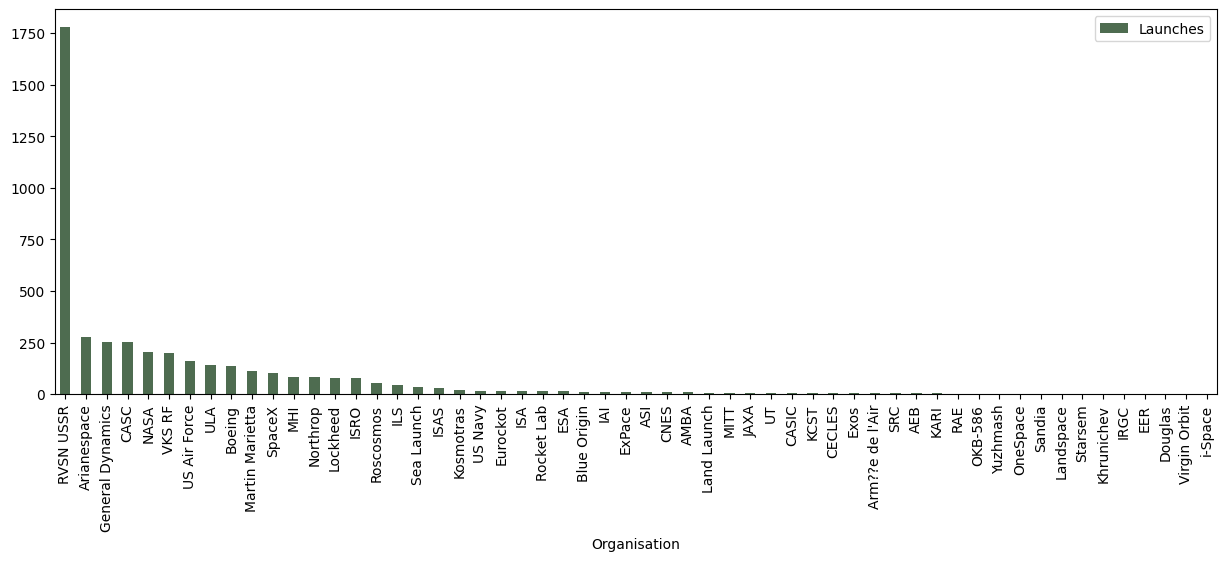

In [12]:
df[["Organisation", "Launches"]].groupby("Organisation").count().sort_values(by="Launches", 
ascending=False).plot.bar(figsize=(15,5), color="#4E6C50")

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [13]:
rocket_status = df.groupby("Rocket_Status")["Rocket_Status"].count()

array([<AxesSubplot: >], dtype=object)

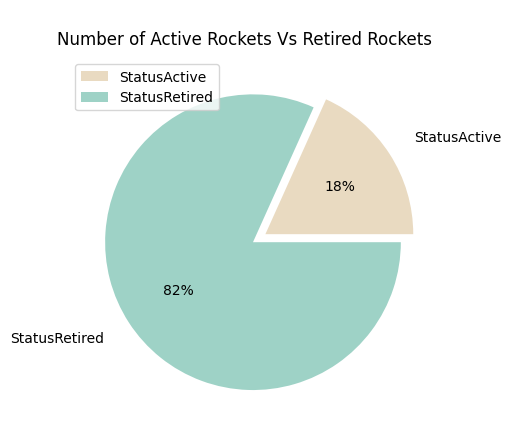

In [14]:
rocket_status.plot.pie(subplots=True, autopct='%1.0f%%', title="\nNumber of Active Rockets Vs Retired Rockets",
fontsize=10,colors=["#E9DAC1", "#9ED2C6"], legend=True, labeldistance=1.2, explode=(0.1,0), ylabel="")

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [15]:
count_messions = df.groupby("Mission_Status")["Mission_Status"].count()

In [16]:
count_messions

Mission_Status
Failure               339
Partial Failure       102
Prelaunch Failure       4
Success              3879
Name: Mission_Status, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [17]:
price_groups = df.groupby("Price")["Price"].count()

Text(0.5, 0, 'Launch Price (Million USD)')

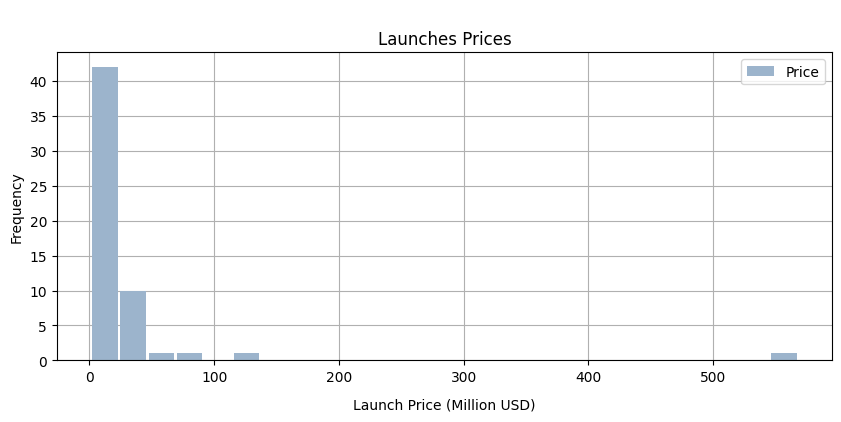

In [18]:
price_groups.plot.hist(bins=25, grid=True, figsize=(10,4), title="\nLaunches Prices",
color='#9CB4CC', zorder=2, rwidth=0.9, legend=True).set_xlabel("Launch Price (Million USD)", labelpad=10)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

# Use a Choropleth Map to Show the Number of Failures by Country


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [19]:
df[["Organisation", "Price"]].groupby("Organisation")["Price"].describe().dropna()

,count,mean,std,min,25%,50%,75%,max
Organisation,,,,,,,,
ASI,4.0,1160.000000,0.000000,1160.0,1160.00,1160.0,1160.00,1160.0
Arianespace,96.0,170.260417,61.734916,37.0,200.00,200.0,200.00,200.0
Boeing,7.0,177.285714,77.721113,133.0,133.00,164.0,164.00,350.0
CASC,162.0,67.779383,175.347118,5.3,29.75,30.8,64.68,1160.0
CECLES,4.0,1160.000000,0.000000,1160.0,1160.00,1160.0,1160.00,1160.0
CNES,4.0,1160.000000,0.000000,1160.0,1160.00,1160.0,1160.00,1160.0
Eurockot,13.0,41.800000,0.000000,41.8,41.80,41.8,41.80,41.8
General Dynamics,30.0,1160.000000,0.000000,1160.0,1160.00,1160.0,1160.00,1160.0
ILS,13.0,101.538462,32.559216,65.0,65.00,109.0,130.00,153.0


# Analyse the Amount of Money Spent by Organisation per Launch

In [20]:
df[["Organisation", "Price"]].groupby("Organisation")["Price"].mean()

Organisation
AEB                         NaN
AMBA                1160.000000
ASI                 1160.000000
Arianespace          170.260417
Arm??e de l'Air             NaN
Blue Origin                 NaN
Boeing               177.285714
CASC                  67.779383
CASIC                       NaN
CECLES              1160.000000
CNES                1160.000000
Douglas                     NaN
EER                   20.000000
ESA                   37.000000
Eurockot              41.800000
ExPace                28.300000
Exos                        NaN
General Dynamics    1160.000000
IAI                         NaN
ILS                  101.538462
IRGC                        NaN
ISA                         NaN
ISAS                1160.000000
ISRO                  32.492537
JAXA                  56.000000
KARI                        NaN
KCST                        NaN
Khrunichev                  NaN
Kosmotras             29.000000
Land Launch                 NaN
Landspace                  

# Chart the Number of Launches per Year

In [21]:
years_count = df.groupby(by="Year")["Year"].count()

<AxesSubplot: title={'center': 'Launches per Year'}, xlabel='Year', ylabel='Number of Launches'>

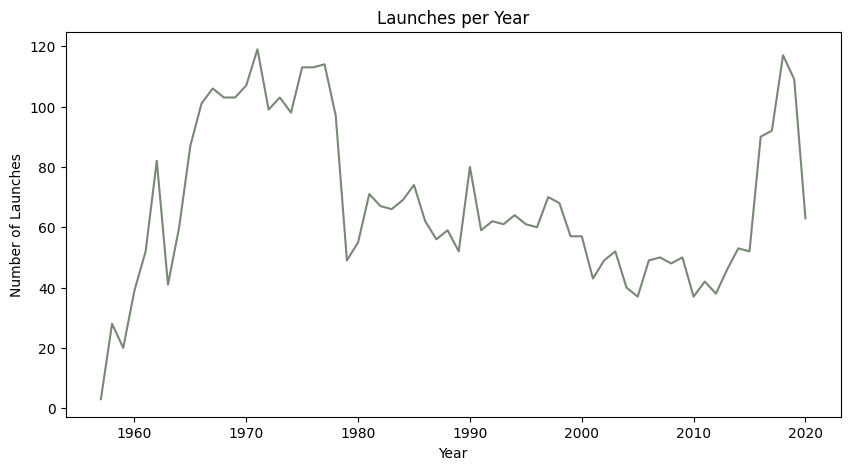

In [22]:
from matplotlib.pyplot import ylabel

years_count.plot.line(title="Launches per Year", color="#798777", figsize=(10,5), ylabel="Number of Launches")

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [23]:
months_count = df.groupby(by="Month")["Month"].count()

Text(0.5, 0, 'Months')

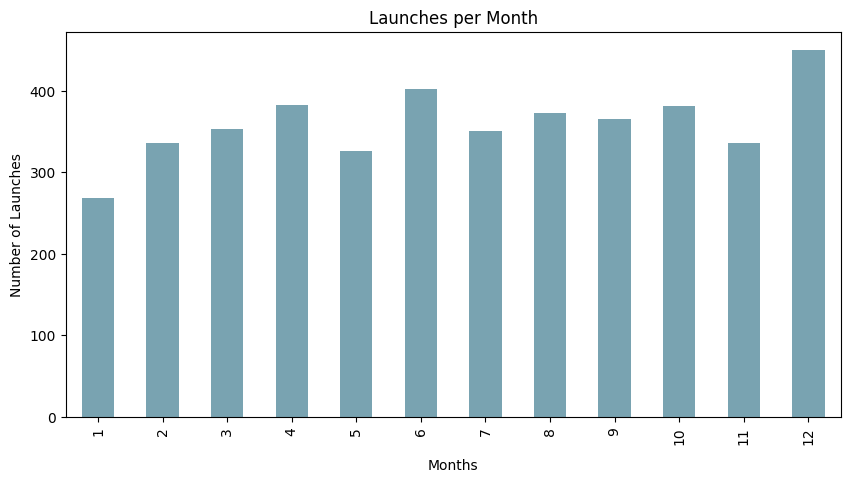

In [24]:
from matplotlib.pyplot import ylabel

months_count.plot.bar(title="Launches per Month", color="#79A3B1", figsize=(10,5), 
ylabel="Number of Launches").set_xlabel("Months", labelpad=10)

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [25]:
mean_price_per_year = df[["Price", "Year"]].groupby(by="Year")["Price"].mean().dropna()

<AxesSubplot: title={'center': 'Mean Launch Price per Year'}, xlabel='Year', ylabel='Price in USD(Million)'>

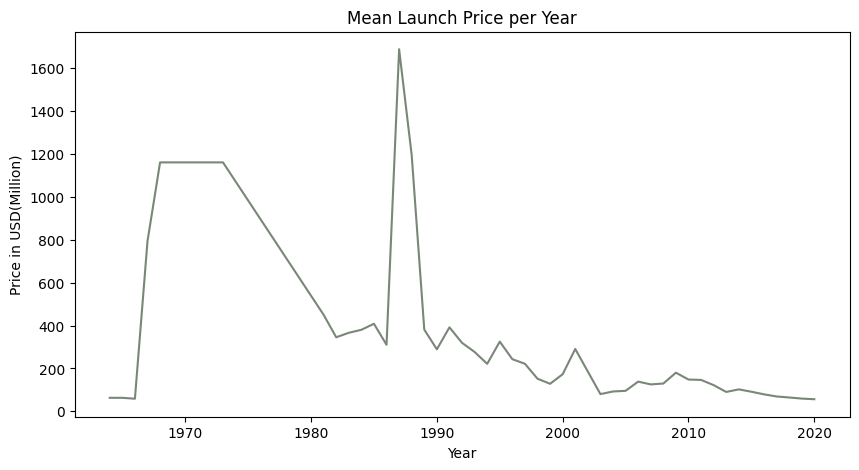

In [26]:
mean_price_per_year.plot.line(title="Mean Launch Price per Year", color="#798777", figsize=(10,5), ylabel="Price in USD(Million)")

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [27]:
sum_per_organisation_launches = df.groupby("Organisation")[["Launches"]].count()

In [28]:
top_ten_organisations_launches = sum_per_organisation_launches.sort_values(by="Launches", ascending=False).head(10)

Text(0.5, 0, 'Organisations')

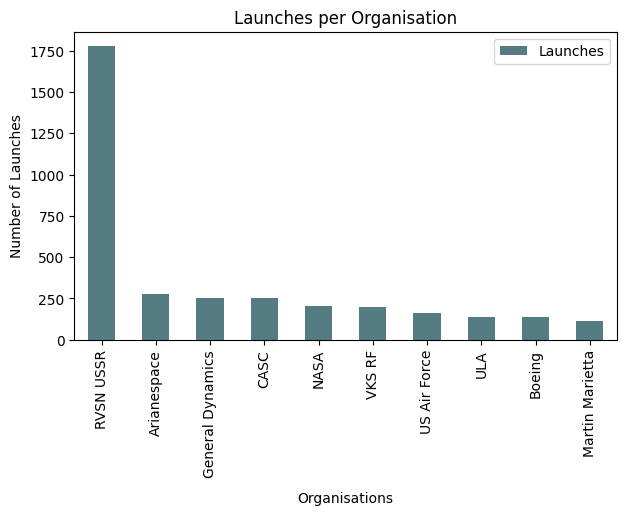

In [29]:
top_ten_organisations_launches.plot.bar(title="Launches per Organisation", color="#557B83", figsize=(7,4), 
ylabel="Number of Launches").set_xlabel("Organisations", labelpad=10)

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [30]:
df["Country"] = 'Other'
df["Country"].loc[df["Location"].str.contains("USA") | df["Location"].str.contains("New Mexico")] = "USA"
df["Country"].loc[df["Location"].str.contains("Kazakhstan") | df["Location"].str.contains("Russia")] = "USSR"

/tmp/ipykernel_30179/4171912904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Country"].loc[df["Location"].str.contains("USA") | df["Location"].str.contains("New Mexico")] = "USA"
/tmp/ipykernel_30179/4171912904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Country"].loc[df["Location"].str.contains("Kazakhstan") | df["Location"].str.contains("Russia")] = "USSR"


array([<AxesSubplot: >], dtype=object)

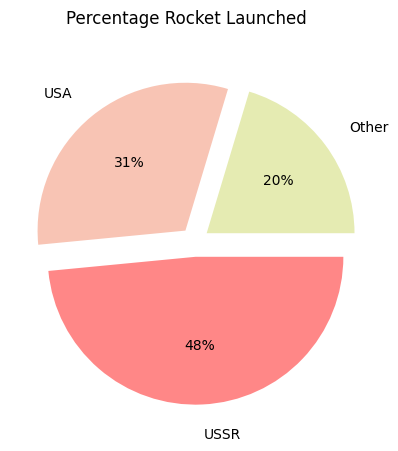

In [31]:
df.groupby("Country").count()["Launches"].plot.pie(subplots=True, autopct='%1.0f%%', title="Percentage Rocket Launched",
fontsize=10, colors=["#E5EBB2", "#F8C4B4", "#FF8787"], legend=False, labeldistance=1.2, explode=(0.1,0.1,0.1), ylabel="")

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [32]:
super_power_df = df[df["Country"] != "Other"]

<AxesSubplot: xlabel='Year,Country'>

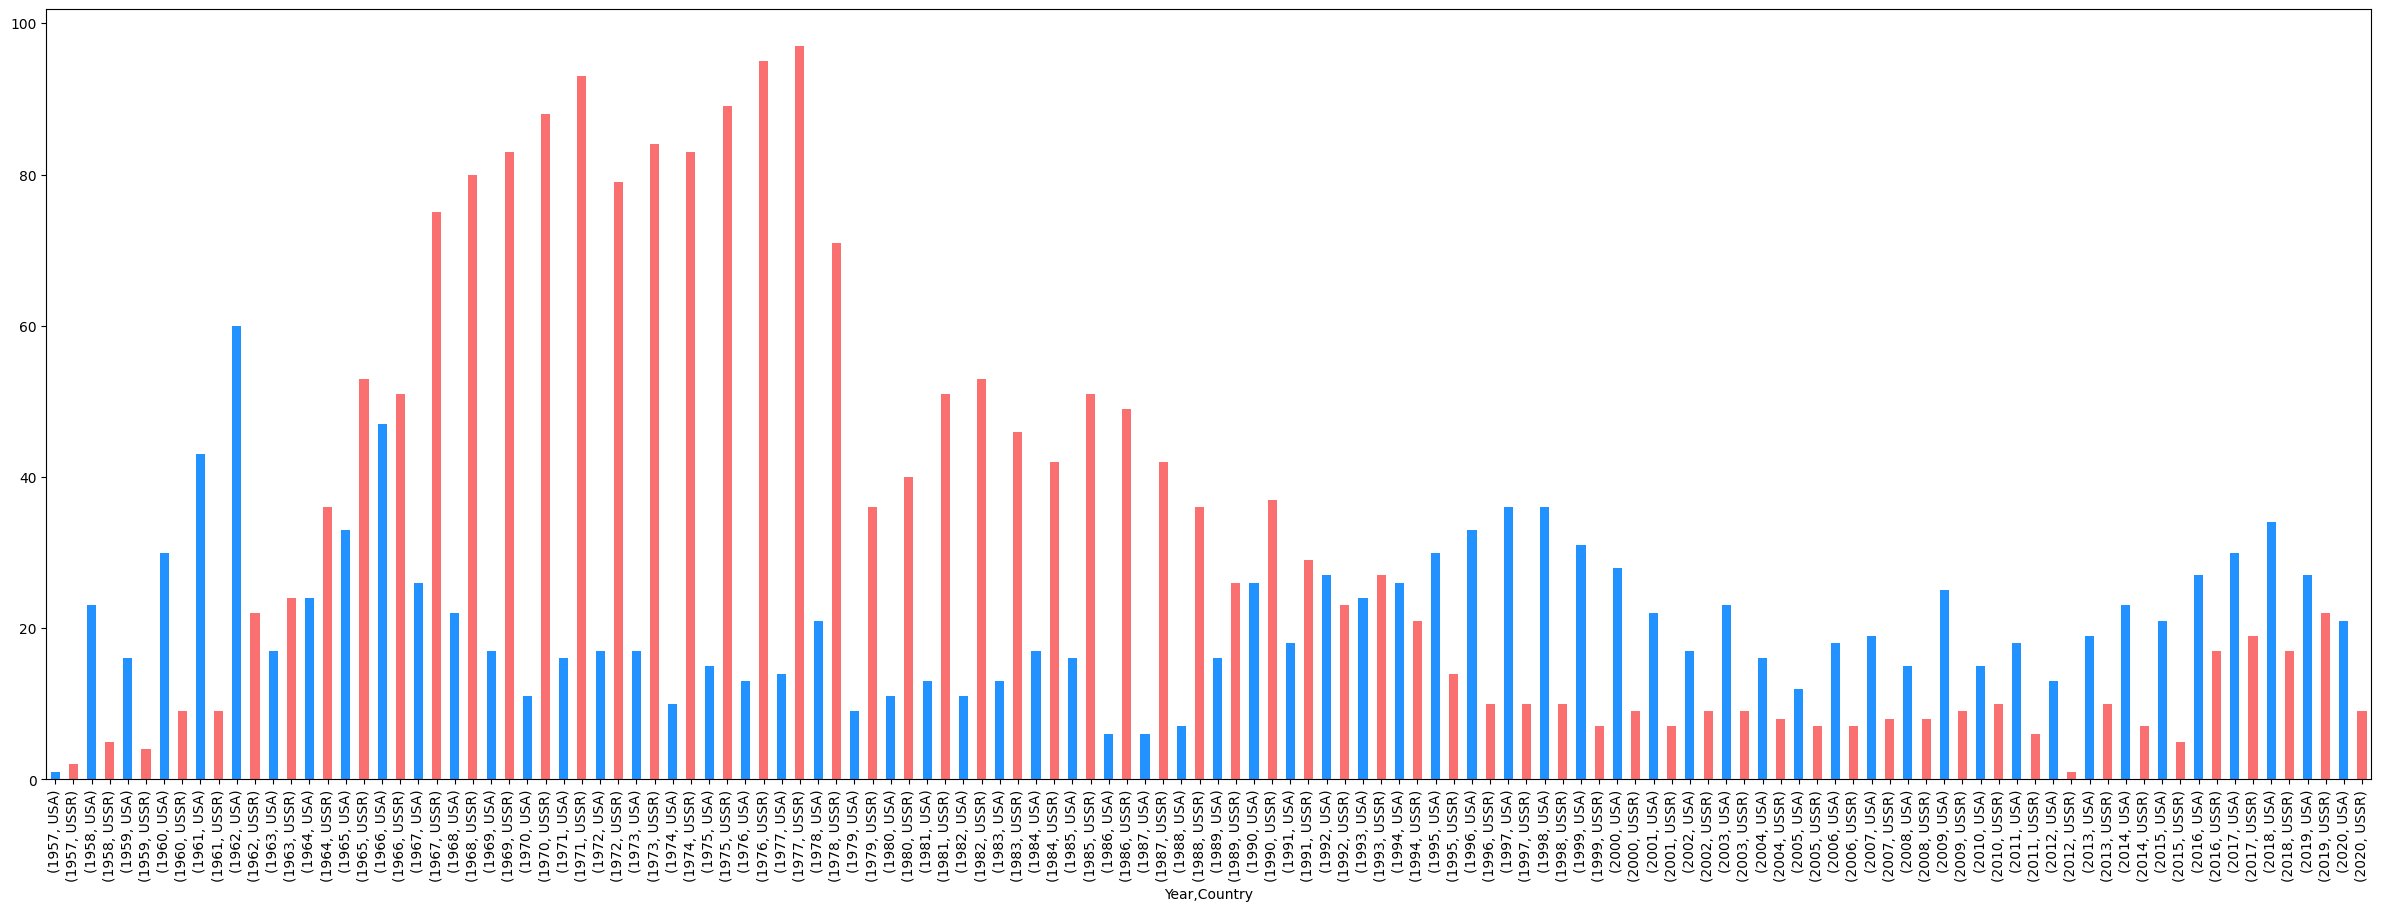

In [33]:
super_power_df.groupby(["Year", "Country"])["Launches"].sum().plot.bar(figsize=(30,10),stacked=True, color=["#2192FF","#FA7070"])

## Chart the Total Number of Mission Failures Year on Year.

In [34]:
failed_missions = super_power_df.groupby(["Mission_Status", "Year"])["Launches"].count()["Failure"]

<AxesSubplot: title={'center': 'Failed Missions Per Year'}, xlabel='Year', ylabel='Number Failed Missions'>

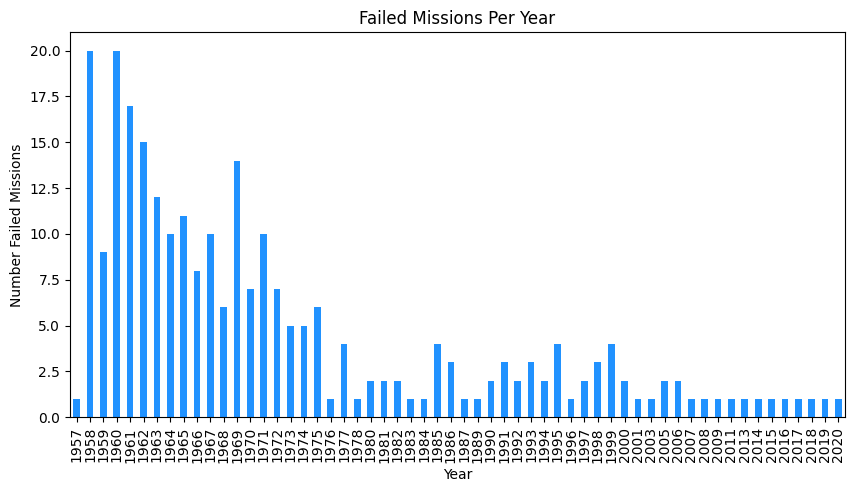

In [35]:
from matplotlib.pyplot import legend

failed_missions.plot.bar(figsize=(10,5),stacked=True, color=["#2192FF"], ylabel="Number Failed Missions", title="Failed Missions Per Year")

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [36]:
missions = super_power_df.groupby(["Mission_Status"])["Launches"].count()
missions.drop(["Prelaunch Failure", "Partial Failure"])

Mission_Status
Failure     262
Success    3097
Name: Launches, dtype: int64

array([<AxesSubplot: >], dtype=object)

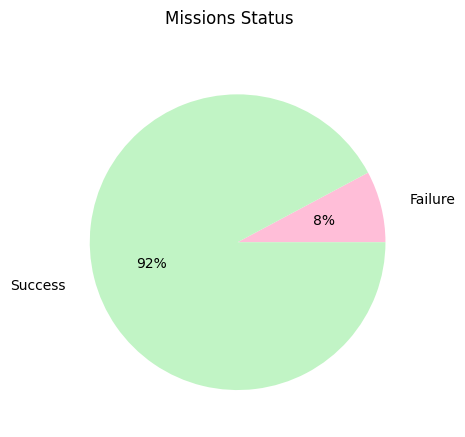

In [37]:
missions.drop(["Prelaunch Failure", "Partial Failure"]).plot.pie(subplots=True, autopct='%1.0f%%', title="Missions Status",
fontsize=10, colors=["#FFBED8", "#C1F4C5"], legend=False, labeldistance=1.2, ylabel="")

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

In [38]:
compare = super_power_df[["Country", "Year", "Launches"]].groupby(["Country", "Year"])[["Launches"]].count().sort_values(by="Launches").sort_values(by=["Year"])
compare.to_csv("filtered.csv")
df_filtered = pd.read_csv('filtered.csv')

In [39]:
df_max = df_filtered.sort_values(by=["Year", "Launches"])
df_max.drop_duplicates(subset="Year", keep="last")

,Country,Year,Launches
1,USSR,1957,2
3,USA,1958,23
4,USA,1959,16
6,USA,1960,30
9,USA,1961,43
...,...,...,...
118,USA,2016,27
121,USA,2017,30
122,USA,2018,34
125,USA,2019,27


# Show the Organisation Doing the Most Number of Launches

In [40]:
df.groupby(["Organisation", "Year"])[["Launches"]].count().sort_values(by=["Year","Launches"]).to_csv("Organisation_filter.csv")
df_organisation = pd.read_csv('Organisation_filter.csv')

In [41]:
filtered_max_organisation = df_organisation.drop_duplicates(subset="Year", keep="last")
filtered_max_organisation

,Organisation,Year,Launches
1,RVSN USSR,1957,2
6,US Navy,1958,12
11,US Air Force,1959,10
15,US Air Force,1960,21
19,US Air Force,1961,23
...,...,...,...
595,CASC,2016,22
613,SpaceX,2017,18
629,CASC,2018,37
647,CASC,2019,27
